In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\ryran\OneDrive\Desktop\ProjectFolder\Google-Playstore.csv")

In [3]:
df.shape

(2312944, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [5]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
#basic statistics for numerical features
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [7]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [8]:
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Developer Website    32.894657
Privacy Policy       18.199879
Released              3.071972
Rating                0.989345
Rating Count          0.989345
Minimum Android       0.282324
Size                  0.008474
Currency              0.005837
Installs              0.004626
Minimum Installs      0.004626
Developer Id          0.001427
Developer Email       0.001340
App Name              0.000086
App Id                0.000000
Price                 0.000000
Free                  0.000000
Maximum Installs      0.000000
Last Updated          0.000000
Content Rating        0.000000
Category              0.000000
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

In [9]:
#Dropping unnecessary columns
df=df.drop(columns=['App Name','App Id','Price','Currency','Minimum Installs','Maximum Installs','Developer Id','Developer Website','Minimum Android','Developer Email','Released','Last Updated','Privacy Policy','Scraped Time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          object 
 1   Rating            float64
 2   Rating Count      float64
 3   Installs          object 
 4   Free              bool   
 5   Size              object 
 6   Content Rating    object 
 7   Ad Supported      bool   
 8   In App Purchases  bool   
 9   Editors Choice    bool   
dtypes: bool(4), float64(2), object(4)
memory usage: 114.7+ MB


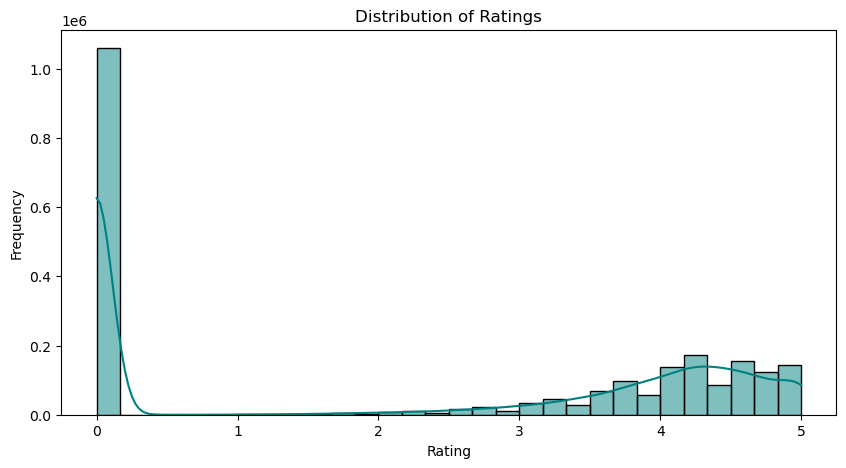

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'], bins=30, kde=True, color='teal')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [12]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [13]:
# # Calculate counts for exact values (e.g., 1.5, 2.5, etc.)
counts = df['Rating'].value_counts()
counts_dict = counts.to_dict()

# Define a helper function to handle exact values (e.g., 1.5, 2.5, etc.)
def handle_exact_rating(rating):
    if rating in [1.5, 2.5, 3.5, 4.5]:  # Add more exact values if needed
        higher_rating = round(rating + 0.1, 1)

        higher_count = counts_dict.get(higher_rating, 0)
        rating_count = counts_dict.get(rating, 0)

        if rating < higher_count:
            return int(rating)  # Round down
        else:
            return int(rating) + 1  # Round up
    return None

# Function to transform the Rating column
def transform_rating(rating):
    if pd.isnull(rating):
        return np.nan
    
    if rating == 0:
        return 0
    elif 1 <= rating < 1.5:
        return 1
    elif 1.5 <= rating < 2.5:
        return handle_exact_rating(1.5) if rating == 1.5 else int(2)
    elif 2.5 <= rating < 3.5:
        return handle_exact_rating(2.5) if rating == 2.5 else int(3)
    elif 3.5 <= rating < 4.5:
        return handle_exact_rating(3.5) if rating == 3.5 else int(4)
    else:
        return 5


In [14]:
# Apply the transformation to the dataframe
df['Transformed_Rating'] = df['Rating'].apply(transform_rating)

df.drop('Rating',axis=1,inplace=True)

In [15]:
# Calculate the mean 'Rating' for each 'Category'
category_means = df.groupby("Category")["Transformed_Rating"].median().astype(int)

# Fill null or blank values in the 'Rating' column with the category-wise mean
df["Transformed_Rating"] = df.apply(
    lambda row: category_means[row["Category"]] if pd.isnull(row["Transformed_Rating"]) else row["Transformed_Rating"],
    axis=1
).astype(int)

In [16]:
df.head()

,Category,Rating Count,Installs,Free,Size,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,Adventure,0.0,10+,True,10M,Everyone,False,False,False,0
1,Tools,64.0,"5,000+",True,2.9M,Everyone,True,False,False,4
2,Productivity,0.0,50+,True,3.7M,Everyone,False,False,False,0
3,Communication,5.0,10+,True,1.8M,Everyone,True,False,False,5
4,Tools,0.0,100+,True,6.2M,Everyone,False,False,False,0


In [17]:
df['Editors Choice'].unique()

array([False,  True])

In [18]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [21]:
df['Content Rating'].value_counts()

Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Adults only 18+        136
Name: Content Rating, dtype: int64

In [20]:
df = df[df["Content Rating"].str.lower() != "unrated"]

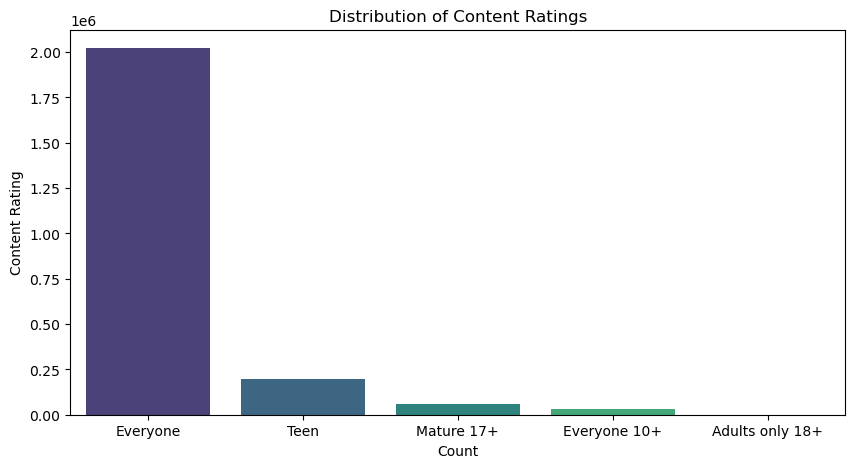

In [22]:
# Plot bar chart for Content Rating distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Content Rating'], order=df['Content Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.show()

In [23]:
def label_encoding(data, category_col):
    # le = LabelEncoder()
    # data[category_col] = le.fit_transform(data[category_col])

    unique_category=df[category_col].unique()
    
    # Save the label encoding mapping
    label_mapping = {category: idx for idx, category in enumerate(unique_category)}
    file_name = f"{category_col}_label_encoded.pkl"
    with open(file_name, "wb") as f:
        pickle.dump(label_mapping, f)
    
    data[category_col]=data[category_col].map(label_mapping)

    
    print(f"Label encoding mapping for '{category_col}' saved in '{file_name}'")
    return data[category_col]

# Apply Label Encoding and save mappings separately
df['Category'] = label_encoding(df, 'Category')
df['Content Rating'] = label_encoding(df, 'Content Rating')


# Verify the result
print(df.head())


Label encoding mapping for 'Category' saved in 'Category_label_encoded.pkl'
Label encoding mapping for 'Content Rating' saved in 'Content Rating_label_encoded.pkl'
   Category  Rating Count Installs  Free  Size  Content Rating  Ad Supported  \
0         0           0.0      10+  True   10M               0         False   
1         1          64.0   5,000+  True  2.9M               0          True   
2         2           0.0      50+  True  3.7M               0         False   
3         3           5.0      10+  True  1.8M               0          True   
4         1           0.0     100+  True  6.2M               0         False   

   In App Purchases  Editors Choice  Transformed_Rating  
0             False           False                   0  
1             False           False                   4  
2             False           False                   0  
3             False           False                   5  
4             False           False                   0  


In [24]:
df['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

In [25]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [26]:
def convert_to_mb(size):
    if isinstance(size, str):
        # Remove commas from the string
        size = size.replace(',', '')

        if 'k' in size:
            # Remove 'k' and convert to MB (1 MB = 1024 KB)
            size = float(size.replace('k', '')) / 1024
        elif 'M' in size:
            # Remove 'M' (already in MB)
            size = float(size.replace('M', ''))
        elif 'G' in size:
            # Remove 'G' and convert to MB (1GB = 1024 MB)
            size = float(size.replace('G', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan

    return size

In [27]:
df['Size'] = df['Size'].apply(convert_to_mb)
# Rename the column 'Size' to 'Size_in_Mb'
df.rename(columns={'Size': 'Size_in_Mb'}, inplace=True)

In [28]:
# Repeat the process for Rating
Q1 = df['Size_in_Mb'].quantile(0.25)
Q3 = df['Size_in_Mb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 154734


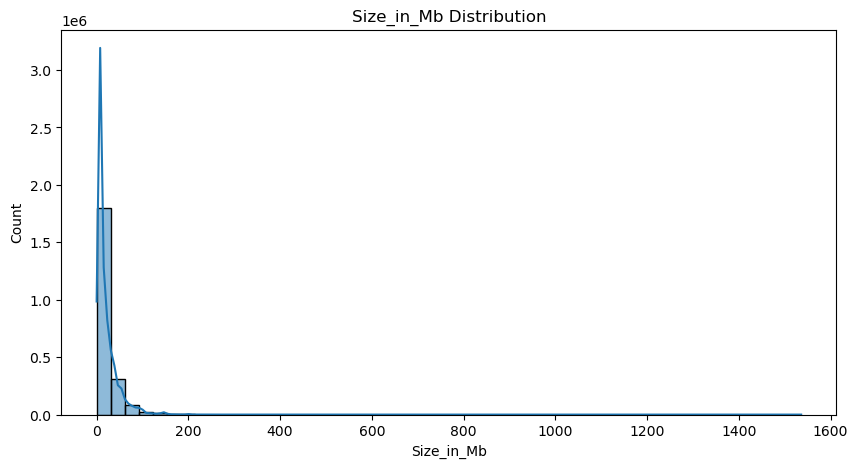

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['Size_in_Mb'], bins=50, kde=True)
plt.title("Size_in_Mb Distribution")
plt.show()

In [30]:
#Replace null values in size column with median category wise 
#As mean values is greater than median and data is +vely skewed hence replacing with median 
df['Size_in_Mb'] = df['Size_in_Mb'].fillna(df.groupby('Category')['Size_in_Mb'].transform('median').round(2))

In [31]:
# Repeat the process for Rating
Q1_rating_count = df['Rating Count'].quantile(0.25)
Q3_rating_count = df['Rating Count'].quantile(0.75)
IQR = Q3_rating_count - Q1_rating_count

lower_bound = Q1_rating_count - 1.5 * IQR
upper_bound = Q3_rating_count + 1.5 * IQR
outliers = df[(df['Size_in_Mb'] < lower_bound) | (df['Size_in_Mb'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 24092


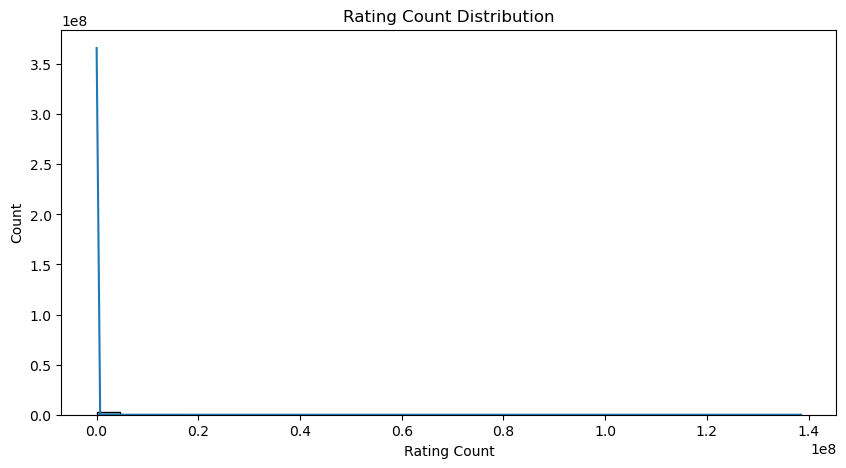

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating Count'], bins=30, kde=True)
plt.title("Rating Count Distribution")
plt.show()

In [33]:
df['Rating Count'] = df['Rating Count'].fillna(df.groupby('Category')['Rating Count'].transform('median').round(2))

In [34]:
#Cleaning Installs Column(remove , and + and convert the data type from object to float)
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')

C:\Users\ryran\AppData\Local\Temp\ipykernel_30856\2496173036.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')


In [35]:
df.dropna(subset=['Installs'], inplace=True)

In [36]:
df.isnull().sum()

Category              0
Rating Count          0
Installs              0
Free                  0
Size_in_Mb            0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
Transformed_Rating    0
dtype: int64

In [37]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,0,0.0,10.0,True,10.0,0,False,False,False,0
1,1,64.0,5000.0,True,2.9,0,True,False,False,4
2,2,0.0,50.0,True,3.7,0,False,False,False,0
3,3,5.0,10.0,True,1.8,0,True,False,False,5
4,1,0.0,100.0,True,6.2,0,False,False,False,0


In [38]:
# boolean columns to 0 and 1
bool_cols = ['Free', 'Ad Supported', 'In App Purchases','Editors Choice']
df[bool_cols] = df[bool_cols].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312683 entries, 0 to 2312943
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Category            int64  
 1   Rating Count        float64
 2   Installs            float64
 3   Free                int32  
 4   Size_in_Mb          float64
 5   Content Rating      int64  
 6   Ad Supported        int32  
 7   In App Purchases    int32  
 8   Editors Choice      int32  
 9   Transformed_Rating  int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 150.0 MB


In [40]:
# Ensure numeric conversion (handling errors and NaNs)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce").fillna(0).astype(int)
df["Free"] = pd.to_numeric(df["Free"], errors="coerce").fillna(0).astype(int)
df["Rating Count"] = pd.to_numeric(df["Rating Count"], errors="coerce").fillna(0).astype(int)
df["Editors Choice"] = pd.to_numeric(df["Editors Choice"], errors="coerce").fillna(0).astype(int)

# Group by 'Category' and apply different aggregation functions
category_stats = (
    df.groupby("Category")
    .agg({
        "Installs": "mean",  # Mean for Installs
        "Free": "median",  # Median for Free
        "Rating Count": "median",  # Median for Rating Count
        "Editors Choice": "median"  # Median for Editors Choice
    })
    .round()
    .fillna(0)  # Fill any remaining NaNs with 0
    # .astype(int)  # Convert to integers
    .to_dict(orient="index")
)

# Save as a pickle file
with open("mean_values.pkl", "wb") as f:
    pickle.dump(category_stats, f)

In [41]:
df.head()

,Category,Rating Count,Installs,Free,Size_in_Mb,Content Rating,Ad Supported,In App Purchases,Editors Choice,Transformed_Rating
0,0,0,10,1,10.0,0,0,0,0,0
1,1,64,5000,1,2.9,0,1,0,0,4
2,2,0,50,1,3.7,0,0,0,0,0
3,3,5,10,1,1.8,0,1,0,0,5
4,1,0,100,1,6.2,0,0,0,0,0


<AxesSubplot:>

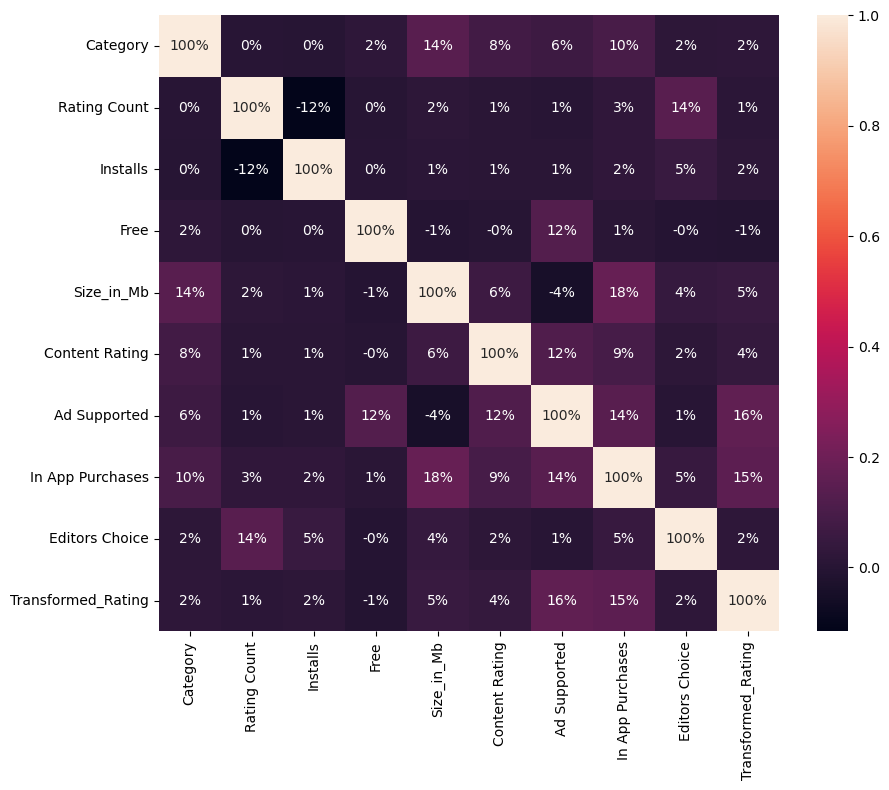

In [42]:
#Visualize the Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

In [43]:
df.to_csv("rating_preprocessed.csv", index=False)

In [ ]:
# Load CSV into Pandas
df = pd.read_csv(r"C:\Users\ryran\OneDrive\Desktop\CdacProject\Google-Playstore-Analysis-and-Prediction-System\rating_preprocessed.csv")

# Connect to MySQL
conn = mysql.connector.connect(host="localhost", user="root", password="Root", database="GooglePlayStore")
cursor = conn.cursor()

# Insert data row by row
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO rating_pred (Category, Rating_Count, Installs, Free, Size_in_Mb, Content_Rating, Ad_Supported, In_App_Purchases, Editors_Choice, Transformed_Rating)
        VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s, %s)
    """, tuple(row))

# Commit and close
conn.commit()
cursor.close()
conn.close()

print("CSV uploaded successfully!")